In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle

In [19]:
# 1. Menentukan dan menampilkan dataset yang akan dipakai pada sebuah dataframe
df_laptop = pd.read_csv("LaptopPrice.csv")
print(df_laptop.head())  # Menampilkan 5 baris pertama untuk memastikan dataset sudah benar

    Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0    Asus         3.830296        16               512    11.185147  2.641094   
1    Acer         2.912833         4              1000    11.311372  3.260012   
2  Lenovo         3.241627         4               256    11.853023  2.029061   
3    Acer         3.806248        16               512    12.280360  4.573865   
4    Acer         3.268097        32              1000    14.990877  4.193472   

          Price  
0  17395.093065  
1  31607.605919  
2   9291.023542  
3  17436.728334  
4  32917.990718  


In [20]:
# 2. Cek apakah ada data yang kosong
print("\nCek Data Kosong:")
print(df_laptop.isnull().sum())  # Menampilkan jumlah nilai kosong di setiap kolom


Cek Data Kosong:
Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64


In [21]:
# 3. Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df_laptop.describe())  # Menampilkan statistik deskriptif


Statistik Deskriptif:
       Processor_Speed     RAM_Size  Storage_Capacity  Screen_Size  \
count      1000.000000  1000.000000       1000.000000  1000.000000   
mean          2.750611    15.500000        584.576000    14.056790   
std           0.731796    10.988665        313.438517     1.705882   
min           1.511580     4.000000        256.000000    11.012111   
25%           2.089246     8.000000        256.000000    12.635523   
50%           2.760885    16.000000        512.000000    14.099643   
75%           3.362610    32.000000       1000.000000    15.528590   
max           3.998534    32.000000       1000.000000    16.985737   

            Weight         Price  
count  1000.000000   1000.000000  
mean      3.466919  19604.187963  
std       0.866541   9406.064880  
min       2.000560   8570.012950  
25%       2.717211  10114.012948  
50%       3.464630  17287.241878  
75%       4.212583  31566.214754  
max       4.990728  33503.935037  


In [22]:
# 4. Menampilkan tipe data pada dataset
print("\nTipe Data:")
print(df_laptop.dtypes)


Tipe Data:
Brand                object
Processor_Speed     float64
RAM_Size              int64
Storage_Capacity      int64
Screen_Size         float64
Weight              float64
Price               float64
dtype: object



Cek Nama Kolom:
Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')


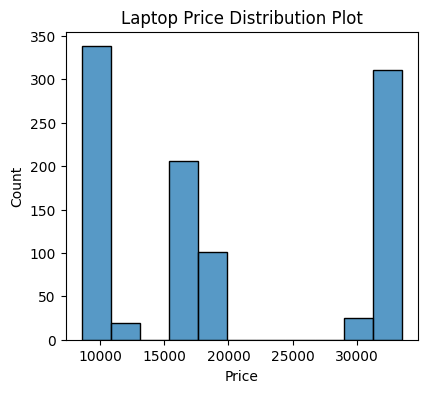

In [23]:
# 5. Menampilkan grafik distribusi harga laptop
# Pastikan nama kolom harga adalah 'Price', jika tidak, sesuaikan nama kolomnya
print("\nCek Nama Kolom:")
print(df_laptop.columns)  # Menampilkan nama-nama kolom

# Jika kolom harga adalah 'Price', maka gunakan nama tersebut
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('Laptop Price Distribution Plot')

# Pastikan kolom 'Price' ada dalam dataset
if 'Price' in df_laptop.columns:
    sns.histplot(df_laptop['Price'])
else:
    print("Kolom 'Price' tidak ditemukan.")

plt.show()

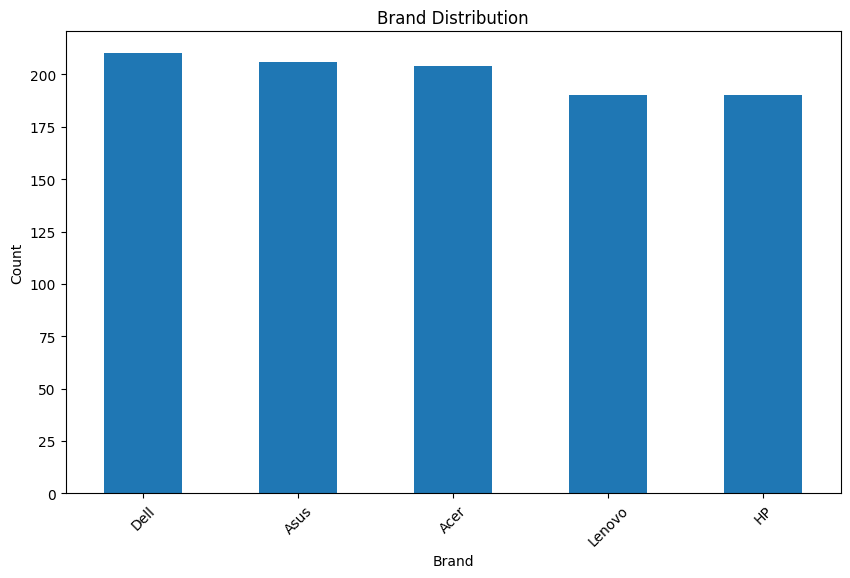

In [24]:
# 6. Tampilkan grafik sebaran nama-nama laptop yang ada pada dataset
if 'Brand' in df_laptop.columns:
    laptop_count = df_laptop['Brand'].value_counts()
    plt.figure(figsize=(10, 6))
    laptop_count.plot(kind="bar")
    plt.title("Brand Distribution")
    plt.xlabel("Brand")
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate nama laptop jika terlalu panjang
    plt.show()
else:
    print("Kolom 'LaptopName' tidak ditemukan dalam dataset.")

In [25]:
# 7. Tampilkan 10 laptop terbanyak pada dataset
if 'Brand' in df_laptop.columns:
    top_10_laptops = df_laptop['Brand'].value_counts().nlargest(10)
    print("\nTop 10 Laptops:")
    print(top_10_laptops)
else:
    print("Kolom 'Brand' tidak ditemukan dalam dataset.")


Top 10 Laptops:
Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64


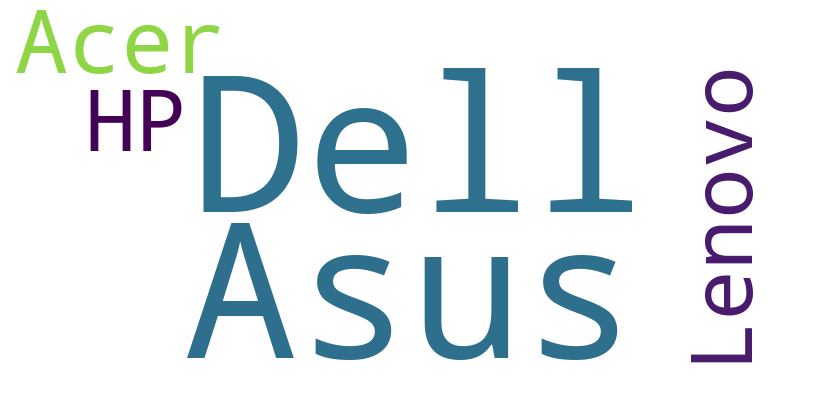

In [26]:
# 8. Buatkan sebuah word cloud untuk nama-nama laptop yang ada
if 'Brand' in df_laptop.columns:
    text = " ".join(df_laptop['Brand'].astype(str))  # Menggabungkan nama laptop menjadi satu string

    # Membuat objek WordCloud
    wordcloud = WordCloud(width=800, height=400,
                        background_color='white',
                        stopwords=STOPWORDS,
                        min_font_size=10).generate(text)

    # Menampilkan word cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
else:
    print("Kolom 'Brand' tidak ditemukan dalam dataset.")

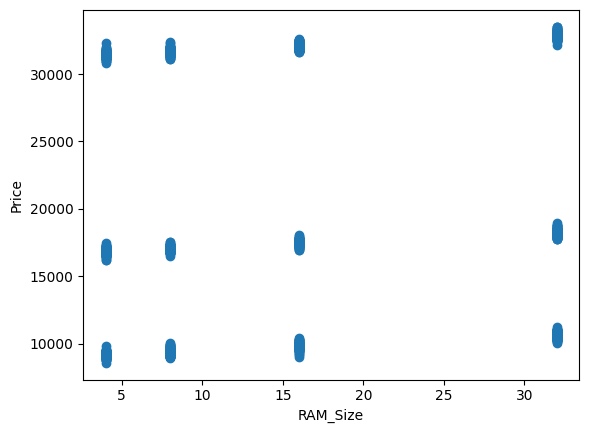

In [27]:
# 9. Tampilkan scatter plot untuk hubungan antara RAM dan harga laptop
if 'RAM_Size' in df_laptop.columns and 'Price' in df_laptop.columns:
    plt.scatter(df_laptop['RAM_Size'], df_laptop['Price'])
    plt.xlabel('RAM_Size')
    plt.ylabel('Price')
    plt.show()
else:
    print("Kolom 'RAM' atau 'Price' tidak ditemukan dalam dataset.")

In [28]:
# 10. Mendefinisikan variabel independent and dependent 
X = df_laptop[['RAM_Size', 'Storage_Capacity', 'Weight', 'Processor_Speed']]
y = df_laptop['Price']

In [29]:
# 11. Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# 12. Membuat dan melatih model dengan linear regression
model_regresi = LinearRegression()
model_regresi.fit(X_train, y_train)

LinearRegression()

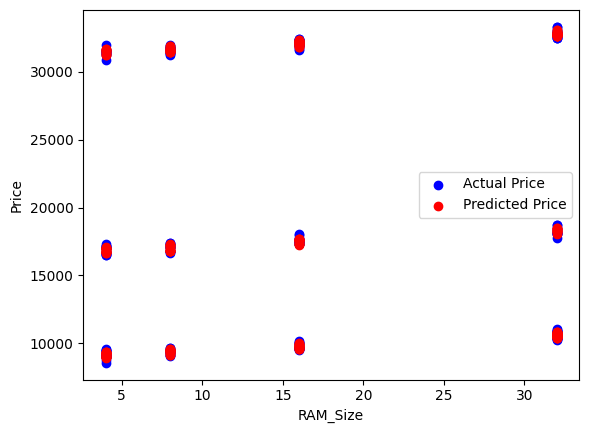

In [31]:
# 13. Memvisualisasikan prediksi model
model_regresi_pred = model_regresi.predict(X_test)
plt.scatter(X_test['RAM_Size'], y_test, label='Actual Price', color='blue')
plt.scatter(X_test['RAM_Size'], model_regresi_pred, label='Predicted Price', color='red')
plt.xlabel('RAM_Size')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
# 14. Memprediksi harga untuk laptop baru
new_laptop = pd.DataFrame({'RAM_Size': [16], 'Storage_Capacity': [512], 'Weight': [1.8], 'Processor_Speed': [3.5]})
predicted_price = model_regresi.predict(new_laptop)
print(f"Predicted price for the new laptop: ${predicted_price[0]:.2f}")

Predicted price for the new laptop: $17611.54


In [33]:
# 15. Mengevaluasi model
mae = mean_absolute_error(y_test, model_regresi_pred)
print(f"MAE: {mae:.2f}")
mse = mean_squared_error(y_test, model_regresi_pred)
print(f"MSE: {mse:.2f}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

MAE: 144.34
MSE: 31737.24
RMSE: 178.15


In [34]:
# 16. Menyimpan model menjadi .sav
filename = 'model_prediksi_harga_laptop.sav'
pickle.dump(model_regresi, open(filename, 'wb'))